# What is Clustering
The goal of clustering is to determine the internal grouping in a set of unlabeled data. But how to decide what constitutes a good clustering? It can be shown that there is no absolute “best” criterion which would be independent of the final aim of the clustering. Consequently, it is the user who should supply this criterion, in such a way that the result of the clustering will suit their needs.
Source: https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a

Info on Silhouette Analysis: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

# Processing Data Here

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

In [2]:
df= pd.read_csv('AB_NYC_2019_raw.csv')

In [3]:
#clustering airbnb listings
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#here im deleting columns that may not give meaningful information
del df['id']
del df['host_id']
del df['name']
del df['host_name']
del df['last_review']

In [104]:
# i want to check if it worked
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [105]:
# I want to see if there will be missing information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [68]:
# so then i'll fill it the blanks with the average number of views for df['reviews_per_month']

In [106]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace = True)

In [108]:
# i want to check if fillna worked
df.head()
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [109]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [73]:
#try value_counts()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [86]:
# then I'm going to make dummies

# select columns based on data type
#object_type_columns = list(df.select_dtypes(include = 'object').columns) 
#print (object_type_columns)

#change object type to numerical type for the analysis
#for column_name in object_type_columns:
    #df[column_name] = pd.get_dummies(df[column_name], drop_first=True)

#df.head() # to check

In [10]:
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['neighbourhood'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['room_type'])], axis=1)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,...,0,0,0,0,0,0,0,0,1,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,...,0,0,0,0,0,0,0,1,0,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,...,0,0,0,0,0,0,0,0,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,...,0,0,0,0,0,0,0,1,0,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,...,0,0,0,0,0,0,0,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,...,0,0,0,0,0,0,0,1,0,0
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,...,0,0,0,0,0,0,0,0,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,...,0,0,0,0,0,0,0,0,1,0
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,...,0,0,0,0,0,0,0,0,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,...,0,0,0,0,0,0,0,1,0,0


In [11]:
del df['neighbourhood_group']
del df['neighbourhood']
del df['room_type']

In [12]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df_columnnames= list(df.columns)

In [14]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df[df_columnnames]

# Separating out the target
#y = df['neighbourhood_group']

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [15]:
df.shape

(48895, 237)

# Dimensionality Reduction

## t-SNE

In [125]:
np.random.seed(123)

indices = np.random.choice(48895, 10000)
X_tsne = X_std[indices] / 255.0

In [126]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results = tsne.fit_transform(X_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.322s...
[t-SNE] Computed neighbors for 10000 samples in 133.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.699528
[t-SNE] KL divergence after 300 iterations: 1.817743


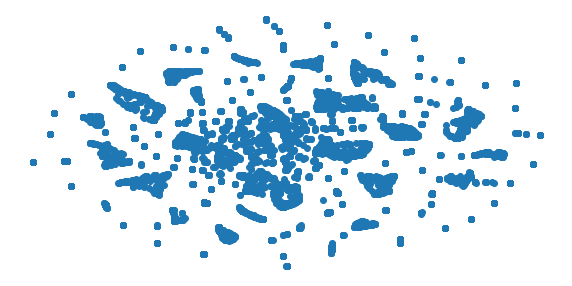

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [128]:
from sklearn.manifold import TSNE
tsne_1 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results_1 = tsne_1.fit_transform(X_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.301s...
[t-SNE] Computed neighbors for 10000 samples in 137.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002365
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.312080
[t-SNE] KL divergence after 300 iterations: 1.669682


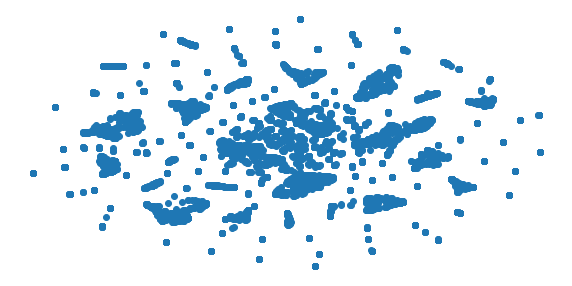

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_1[:, 0], tsne_results_1[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [130]:
from sklearn.manifold import TSNE
tsne_2 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results_2 = tsne_2.fit_transform(X_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.336s...
[t-SNE] Computed neighbors for 10000 samples in 138.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.001754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.827595
[t-SNE] KL divergence after 300 iterations: 2.018538


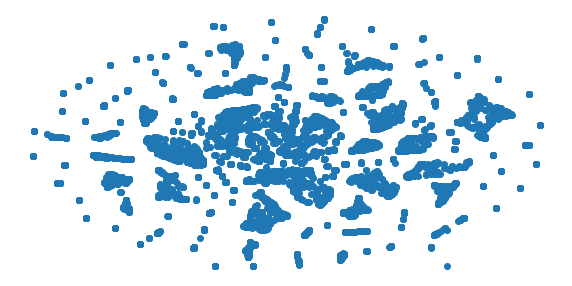

In [131]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_2[:, 0], tsne_results_2[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [132]:
from sklearn.manifold import TSNE
tsne_3 = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results_3 = tsne_3.fit_transform(X_tsne)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.370s...
[t-SNE] Computed neighbors for 10000 samples in 137.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002655
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.317234
[t-SNE] KL divergence after 300 iterations: 1.549627


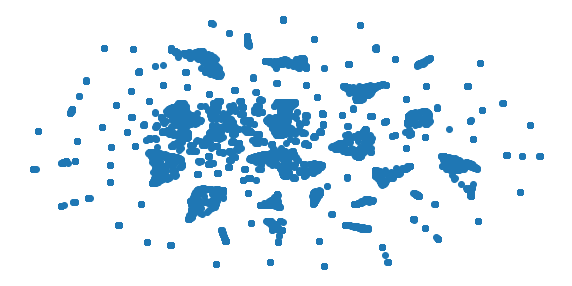

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_3[:, 0], tsne_results_3[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP

In [136]:
import umap

In [137]:
np.random.seed(123)

indices = np.random.choice(48895, 10000)
X_UMAP = X_std[indices] / 255.0

In [138]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_UMAP)

//anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-pac

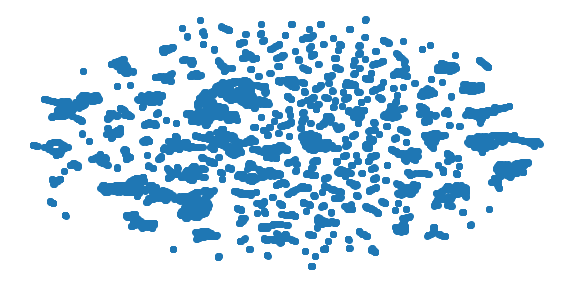

In [139]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [140]:
umap_results_1 = umap.UMAP(n_neighbors=10,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_UMAP)

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 162 separate connected components using meta-embedding (experimental)
  n_components


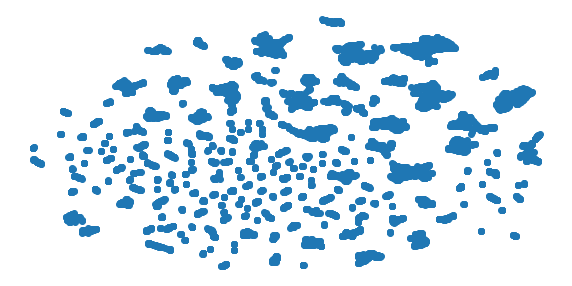

In [141]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results_1[:, 0], umap_results_1[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Clustering Techniques

## Gaussian Mixture Models (GMM)

In [142]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

In [143]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters_gmm = gmm_cluster.fit_predict(X_std)

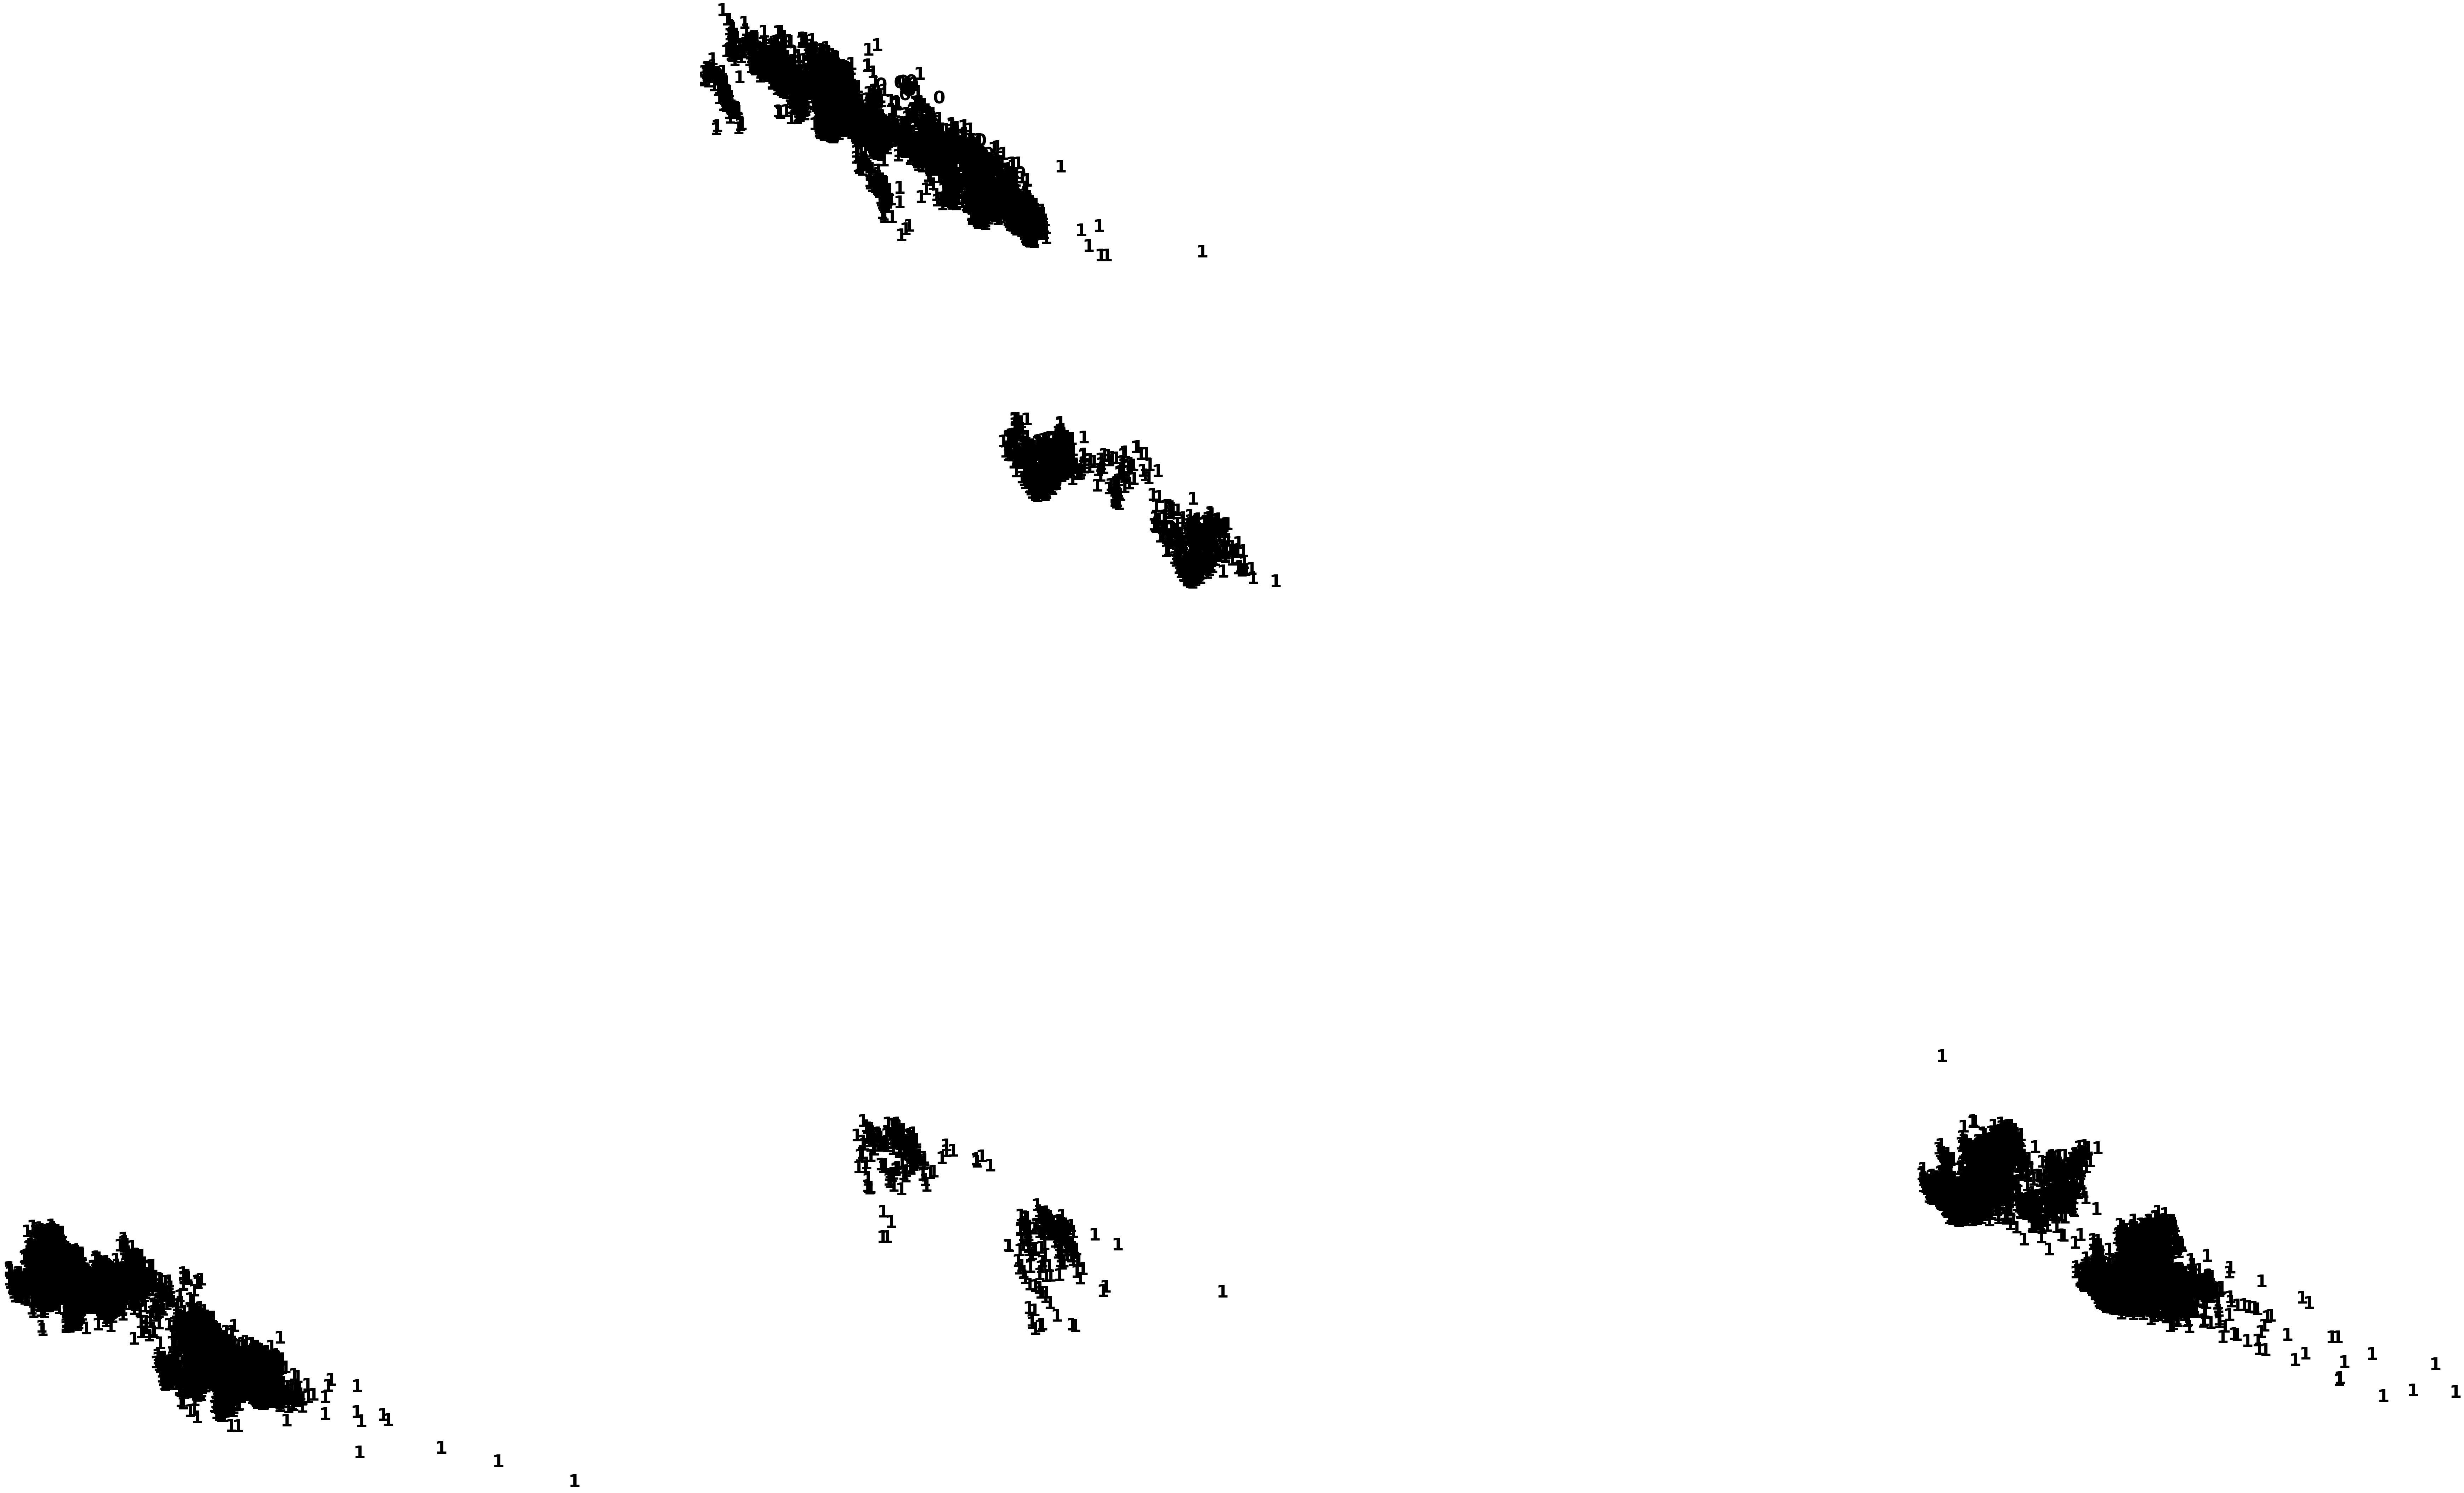

In [145]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_gmm[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [150]:
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_gmm, metric='euclidean')))

The silhouette score of the GMM solution: 0.04703280442709343


## DBSCAN

In [2]:
from sklearn.cluster import DBSCAN

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)

# Fit model
clusters_dbscan = dbscan_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [38]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.9408162674215248


## Hierarchical Clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
# cell is not updated

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=5)

# Fit model
clusters_agg = agg_cluster.fit_predict(X_std)

NameError: name 'X_std' is not defined